# First stage

In [1]:
import sys
sys.path.append('..')
from get_data import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
target_code = '0050'

In [2]:
all_df = get_one_stock_data(stock_code=target_code)
# all_df = get_one_file(stock_code=target_code, year_month='202202')

2022-10-15 19:31:59.752 | INFO     | get_data.py         :   50 | /Users/anthonywah/Desktop/MAFM/MAFS6100-2/order_placement_data/0050/0050_md_202202_202202.csv.gz - Got 453454 entries - 58.37s
2022-10-15 19:32:18.087 | INFO     | get_data.py         :   50 | /Users/anthonywah/Desktop/MAFM/MAFS6100-2/order_placement_data/0050/0050_md_202205_202205.csv.gz - Got 651378 entries - 76.78s
2022-10-15 19:32:18.290 | INFO     | get_data.py         :   50 | /Users/anthonywah/Desktop/MAFM/MAFS6100-2/order_placement_data/0050/0050_md_202201_202201.csv.gz - Got 653582 entries - 76.98s
2022-10-15 19:32:20.820 | INFO     | get_data.py         :   50 | /Users/anthonywah/Desktop/MAFM/MAFS6100-2/order_placement_data/0050/0050_md_202203_202203.csv.gz - Got 678434 entries - 79.29s
2022-10-15 19:32:23.038 | INFO     | get_data.py         :   50 | /Users/anthonywah/Desktop/MAFM/MAFS6100-2/order_placement_data/0050/0050_md_202204_202204.csv.gz - Got 694253 entries - 81.69s
2022-10-15 19:32:25.972 | INFO     

In [3]:
gb = all_df.groupby('date')

### 1. Spread Distribution (in bps)

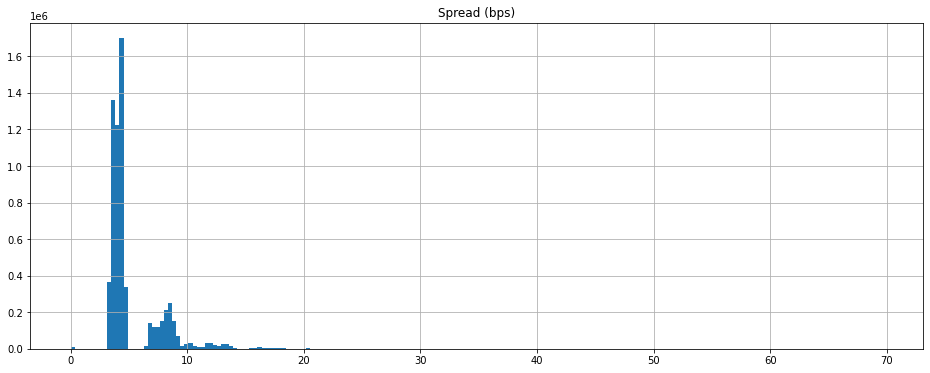

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Spread (bps)')
ax.hist(all_df['spread_bps'], bins=200)
ax.grid(True)
plt.show()

### 2. Spread Distribution (in # ticks)

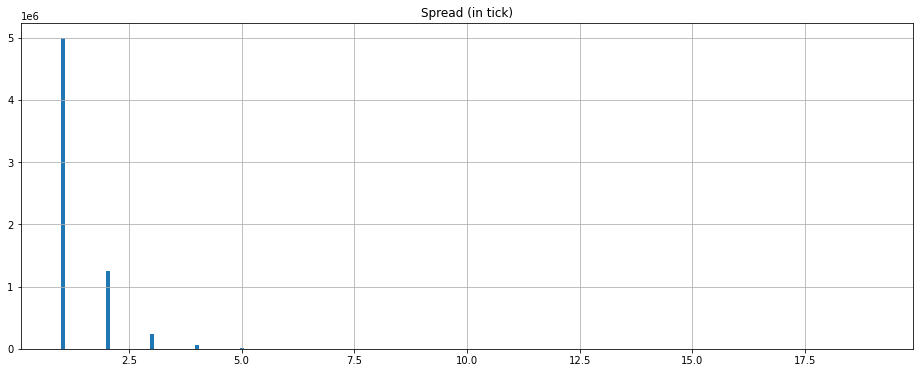

In [5]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Spread (in tick)')
ax.hist(all_df['spread_in_tick'], bins=200)
ax.grid(True)
plt.show()

### 3. Intraday Spread Profile (in bps)

In [6]:
all_df.loc[:, '1m_bin'] = all_df['dt'].dt.floor(freq='1min').dt.time.astype(str)
all_df.loc[:, '5m_bin'] = all_df['dt'].dt.floor(freq='5min').dt.time.astype(str)

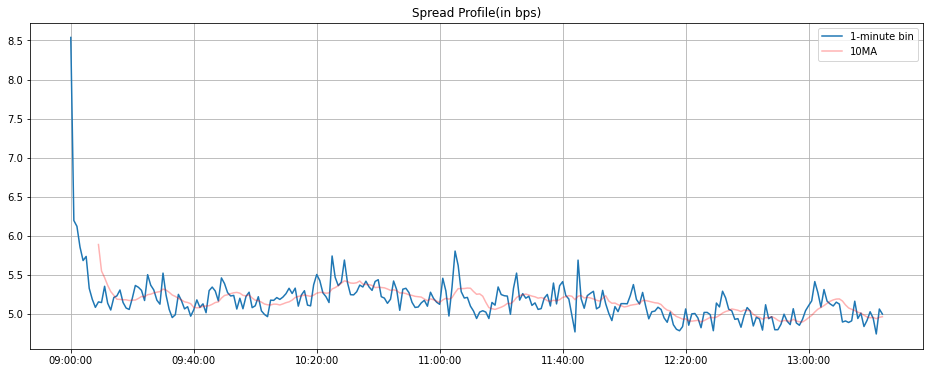

In [7]:
# 1-min bin average spread (in bps)
df_bin = all_df.groupby('1m_bin')[['spread_bps']].mean().reset_index()
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Spread Profile(in bps)')
ax.plot(df_bin['1m_bin'], df_bin['spread_bps'], label='1-minute bin')
ax.plot(df_bin['1m_bin'], df_bin['spread_bps'].rolling(10).mean(), color='red', alpha=0.3, label='10MA')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

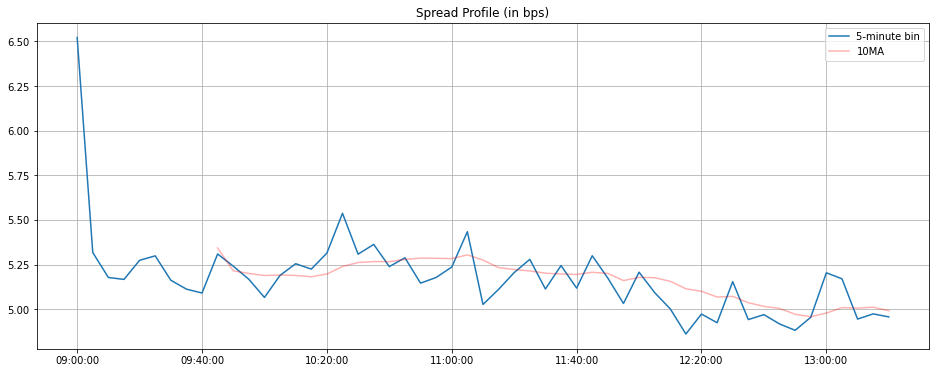

In [8]:
# 5-min bin average spread (in bps)
df_bin = all_df.groupby('5m_bin')[['spread_bps']].mean().reset_index()
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Spread Profile (in bps)')
ax.plot(df_bin['5m_bin'], df_bin['spread_bps'], label='5-minute bin')
ax.plot(df_bin['5m_bin'], df_bin['spread_bps'].rolling(10).mean(), color='red', alpha=0.3, label='10MA')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

### 4. Intraday Spread Profile (in # ticks)

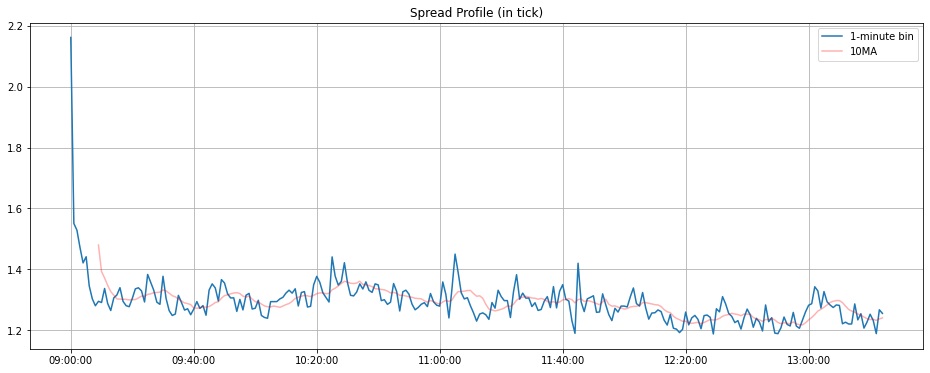

In [9]:
# 1-min bin average spread (in # ticks)
df_bin = all_df.groupby('1m_bin')[['spread_in_tick']].mean().reset_index()
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Spread Profile (in tick)')
ax.plot(df_bin['1m_bin'], df_bin['spread_in_tick'], label='1-minute bin')
ax.plot(df_bin['1m_bin'], df_bin['spread_in_tick'].rolling(10).mean(), color='red', alpha=0.3, label='10MA')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

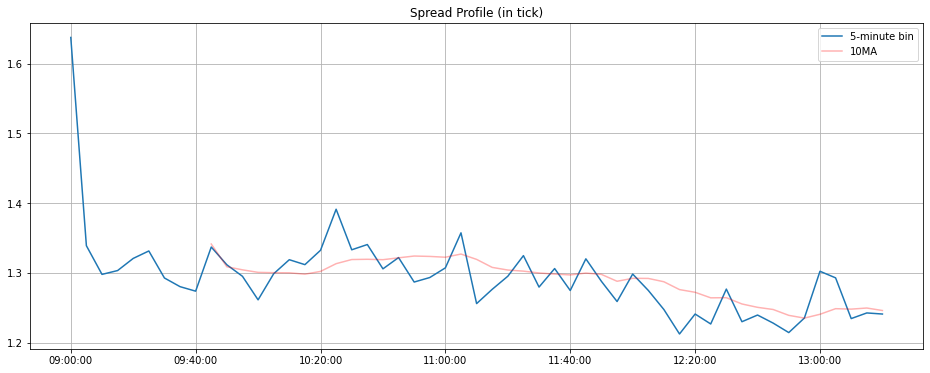

In [10]:
# 5-min bin average spread (in # ticks)
df_bin = all_df.groupby('5m_bin')[['spread_in_tick']].mean().reset_index()
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Spread Profile (in tick)')
ax.plot(df_bin['5m_bin'], df_bin['spread_in_tick'], label='5-minute bin')
ax.plot(df_bin['5m_bin'], df_bin['spread_in_tick'].rolling(10).mean(), color='red', alpha=0.3, label='10MA')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

### 5. Transition Matrix

In [11]:
def get_one_day_trans_count(df, only_chg_on_trades=False):
    date = df['date'].iloc[0]
    df = df.loc[df['SP1'] > 0, :].reset_index(drop=True)
    df.loc[:, 'spread_in_tick_next'] = df['spread_in_tick'].shift(-1)
    dropna_cols = ['spread_in_tick_next'] if not only_chg_on_trades else ['spread_in_tick_next', 'lastPx']
    df = df.dropna(subset=dropna_cols).reset_index(drop=True)
    df.rename(columns={'spread_in_tick_next': 'spr_T1', 'spread_in_tick': 'spr_T0'}, inplace=True)
    return df[['spr_T1', 'spr_T0', 'dt']].copy()

In [12]:
st = datetime.datetime.now()
res_df = [get_one_day_trans_count(i, False) for date, i in gb]
log_info(f'Got {len(res_df)} days transition count - {(datetime.datetime.now() - st).total_seconds():.2f}s')
res_df = pd.concat(res_df).reset_index(drop=True)
res_df = res_df.groupby(['spr_T0', 'spr_T1'])['dt'].count().reset_index().rename(columns={'dt': 'count'}) 
res_df = pd.pivot_table(res_df, index='spr_T0', columns='spr_T1')
res_df.columns = [i[1] for i in res_df.columns]
res_df.columns.name = 'spr_T1'
res_cnt_df = res_df.copy()
res_pct_df = 100 * (res_df.T / res_df.sum(axis=1)).T

2022-10-15 19:36:58.668 | INFO     | 4286765259.py       :    3 | Got 181 days transition count - 20.25s


In [13]:
res_cnt_df

spr_T1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,18.0,19.0
spr_T0,,,,,,,,,,,,,,,,
1.0,4922814.0,63789.0,3243.0,554.0,145.0,18.0,7.0,8.0,3.0,3.0,1.0,1.0,1.0,NaN,NaN,1.0
2.0,64248.0,1170880.0,10720.0,570.0,77.0,19.0,5.0,8.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN
3.0,2922.0,11204.0,226487.0,2602.0,104.0,14.0,5.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4.0,461.0,562.0,2744.0,56809.0,657.0,49.0,6.0,3.0,NaN,4.0,1.0,1.0,NaN,NaN,NaN,NaN
5.0,92.0,80.0,129.0,696.0,11067.0,210.0,10.0,4.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN
6.0,19.0,15.0,16.0,46.0,222.0,3117.0,48.0,2.0,4.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
7.0,8.0,4.0,1.0,4.0,10.0,50.0,510.0,13.0,6.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN
8.0,6.0,5.0,4.0,5.0,3.0,5.0,13.0,150.0,10.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN
9.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,9.0,91.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN


In [14]:
res_pct_df

spr_T1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,18.0,19.0
spr_T0,,,,,,,,,,,,,,,,
1.0,98.641964,1.278186,0.064982,0.011101,0.002905,0.000361,0.000140,0.000160,0.000060,0.000060,0.000020,0.000020,0.000020,NaN,NaN,0.000020
2.0,5.154127,93.930776,0.859984,0.045727,0.006177,0.001524,0.000401,0.000642,0.000241,0.000321,0.000080,NaN,NaN,NaN,NaN,NaN
3.0,1.200750,4.604106,93.071240,1.069251,0.042737,0.005753,0.002055,0.001644,0.001644,0.000822,NaN,NaN,NaN,NaN,NaN,NaN
4.0,0.752076,0.916847,4.476565,92.678271,1.071831,0.079939,0.009788,0.004894,NaN,0.006526,0.001631,0.001631,NaN,NaN,NaN,NaN
5.0,0.748272,0.650671,1.049207,5.660838,90.012200,1.708011,0.081334,0.032534,0.016267,0.032534,NaN,0.008133,NaN,NaN,NaN,NaN
6.0,0.543789,0.429307,0.457928,1.316543,6.353749,89.210074,1.373784,0.057241,0.114482,0.085861,NaN,0.057241,NaN,NaN,NaN,NaN
7.0,1.313629,0.656814,0.164204,0.656814,1.642036,8.210181,83.743842,2.134647,0.985222,NaN,NaN,0.328407,0.164204,NaN,NaN,NaN
8.0,2.941176,2.450980,1.960784,2.450980,1.470588,2.450980,6.372549,73.529412,4.901961,0.980392,NaN,NaN,NaN,0.490196,NaN,NaN
9.0,2.380952,3.174603,2.380952,1.587302,2.380952,2.380952,2.380952,7.142857,72.222222,1.587302,0.793651,NaN,1.587302,NaN,NaN,NaN


In [15]:
# Only change on trades
st = datetime.datetime.now()
res_df = [get_one_day_trans_count(i, True) for date, i in gb]
log_info(f'Got {len(res_df)} days transition count - {(datetime.datetime.now() - st).total_seconds():.2f}s')
res_df = pd.concat(res_df).reset_index(drop=True)
res_df = res_df.groupby(['spr_T0', 'spr_T1'])['dt'].count().reset_index().rename(columns={'dt': 'count'}) 
res_df = pd.pivot_table(res_df, index='spr_T0', columns='spr_T1')
res_df.columns = [i[1] for i in res_df.columns]
res_df.columns.name = 'spr_T1'
res_cnt_df = res_df.copy()
res_pct_df = 100 * (res_df.T / res_df.sum(axis=1)).T

2022-10-15 19:37:16.981 | INFO     | 212503260.py        :    4 | Got 181 days transition count - 16.30s


In [16]:
res_cnt_df

spr_T1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,18.0,19.0
spr_T0,,,,,,,,,,,,,,,,
1.0,453131.0,9711.0,524.0,123.0,45.0,4.0,4.0,2.0,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN
2.0,9267.0,91307.0,1416.0,85.0,13.0,3.0,4.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3.0,548.0,1437.0,17448.0,342.0,11.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,90.0,90.0,320.0,4291.0,97.0,11.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5.0,19.0,18.0,23.0,76.0,908.0,27.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,2.0,4.0,3.0,8.0,33.0,379.0,13.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7.0,6.0,2.0,NaN,1.0,NaN,14.0,87.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,2.0,1.0,3.0,NaN,NaN,1.0,5.0,50.0,6.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,21.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [17]:
res_pct_df

spr_T1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,18.0,19.0
spr_T0,,,,,,,,,,,,,,,,
1.0,97.752346,2.094920,0.113041,0.026534,0.009708,0.000863,0.000863,0.000431,0.000431,0.000431,0.000216,NaN,0.000216,NaN,NaN,NaN
2.0,9.076485,89.429867,1.386889,0.083253,0.012733,0.002938,0.003918,0.000979,0.000979,0.000979,0.000979,NaN,NaN,NaN,NaN,NaN
3.0,2.769355,7.261977,88.174651,1.728320,0.055589,0.005054,NaN,NaN,0.005054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,1.836735,1.836735,6.530612,87.571429,1.979592,0.224490,NaN,NaN,NaN,0.020408,NaN,NaN,NaN,NaN,NaN,NaN
5.0,1.760890,1.668211,2.131603,7.043559,84.151993,2.502317,0.463392,0.278035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,0.451467,0.902935,0.677201,1.805869,7.449210,85.553047,2.934537,NaN,NaN,0.225734,NaN,NaN,NaN,NaN,NaN,NaN
7.0,5.084746,1.694915,NaN,0.847458,NaN,11.864407,73.728814,5.084746,1.694915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,2.898551,1.449275,4.347826,NaN,NaN,1.449275,7.246377,72.463768,8.695652,NaN,NaN,NaN,NaN,1.449275,NaN,NaN
9.0,3.571429,3.571429,NaN,7.142857,NaN,NaN,NaN,3.571429,75.000000,3.571429,NaN,NaN,3.571429,NaN,NaN,NaN
